In [387]:
# Importing dependencies and file.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

file_path = "Resources/emissions_dataframe.csv"
emissions = pd.read_csv(file_path)

In [388]:
# Checking file import.
emissions

,area,year,Emissions_CH4,Emissions_CO2,Emissions_CO2eq_AR5,Emissions_CO2eq_from_CH4_AR5,Emissions_CO2eq_from_F-gases_AR5,Emissions_CO2eq_from_N2O_AR5,Emissions_N2O,population,deaths_caused_by_outdoor_air_pollution,deaths_caused_by_household_pollution_from_solid_fuels,deaths_caused_by_air_pollution
0,Afghanistan,2000,419.1023,-1474.8030,13346.3010,11734.8635,NaN,3086.2405,11.6462,19542982.0,4021,45132,48763
1,Afghanistan,2001,371.2675,1066.9016,14189.0978,10395.4910,NaN,2726.7051,10.2895,19688632.0,4014,45028,48660
2,Afghanistan,2002,447.8971,1347.9016,17043.7102,12541.1191,NaN,3154.6895,11.9045,21000256.0,3961,44137,47732
3,Afghanistan,2003,463.6655,1478.9016,17744.0810,12982.6335,NaN,3282.5460,12.3870,22645130.0,4116,44953,48687
4,Afghanistan,2004,465.8062,1187.9016,17494.7135,13042.5729,NaN,3264.2390,12.3179,23553551.0,4176,44534,48337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,Suriname,2015,35.0855,10853.0806,12047.6211,982.3933,0.0,212.1471,0.8006,575475.0,276,52,329
2916,Suriname,2016,35.4646,11536.3878,12757.1288,993.0085,0.0,227.7325,0.8594,581453.0,272,51,325
2917,Suriname,2017,34.8279,11740.4385,12951.8067,975.1807,0.0,236.1876,0.8913,587559.0,263,50,313
2918,Suriname,2018,33.7716,12170.5588,13314.9521,945.6055,0.0,198.7878,0.7501,593715.0,261,49,310


In [389]:
emissions['Emissions_CO2eq_from_F-gases_AR5'] = emissions['Emissions_CO2eq_from_F-gases_AR5'].fillna(0)

In [390]:
emissions['total_emissions'] = emissions['Emissions_CH4'] + emissions['Emissions_CO2'] + emissions['Emissions_CO2eq_AR5'] + emissions['Emissions_CO2eq_from_CH4_AR5'] + emissions['Emissions_CO2eq_from_F-gases_AR5'] + emissions['Emissions_CO2eq_from_N2O_AR5'] + emissions['Emissions_N2O'] 

In [391]:
emissions['total_deaths'] = emissions['deaths_caused_by_outdoor_air_pollution'] + emissions['deaths_caused_by_household_pollution_from_solid_fuels'] + emissions['deaths_caused_by_air_pollution'] 

In [392]:
emissions

,area,year,Emissions_CH4,Emissions_CO2,Emissions_CO2eq_AR5,Emissions_CO2eq_from_CH4_AR5,Emissions_CO2eq_from_F-gases_AR5,Emissions_CO2eq_from_N2O_AR5,Emissions_N2O,population,deaths_caused_by_outdoor_air_pollution,deaths_caused_by_household_pollution_from_solid_fuels,deaths_caused_by_air_pollution,total_emissions,total_deaths
0,Afghanistan,2000,419.1023,-1474.8030,13346.3010,11734.8635,0.0,3086.2405,11.6462,19542982.0,4021,45132,48763,27123.3505,97916
1,Afghanistan,2001,371.2675,1066.9016,14189.0978,10395.4910,0.0,2726.7051,10.2895,19688632.0,4014,45028,48660,28759.7525,97702
2,Afghanistan,2002,447.8971,1347.9016,17043.7102,12541.1191,0.0,3154.6895,11.9045,21000256.0,3961,44137,47732,34547.2220,95830
3,Afghanistan,2003,463.6655,1478.9016,17744.0810,12982.6335,0.0,3282.5460,12.3870,22645130.0,4116,44953,48687,35964.2146,97756
4,Afghanistan,2004,465.8062,1187.9016,17494.7135,13042.5729,0.0,3264.2390,12.3179,23553551.0,4176,44534,48337,35467.5511,97047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,Suriname,2015,35.0855,10853.0806,12047.6211,982.3933,0.0,212.1471,0.8006,575475.0,276,52,329,24131.1282,657
2916,Suriname,2016,35.4646,11536.3878,12757.1288,993.0085,0.0,227.7325,0.8594,581453.0,272,51,325,25550.5816,648
2917,Suriname,2017,34.8279,11740.4385,12951.8067,975.1807,0.0,236.1876,0.8913,587559.0,263,50,313,25939.3327,626
2918,Suriname,2018,33.7716,12170.5588,13314.9521,945.6055,0.0,198.7878,0.7501,593715.0,261,49,310,26664.4259,620


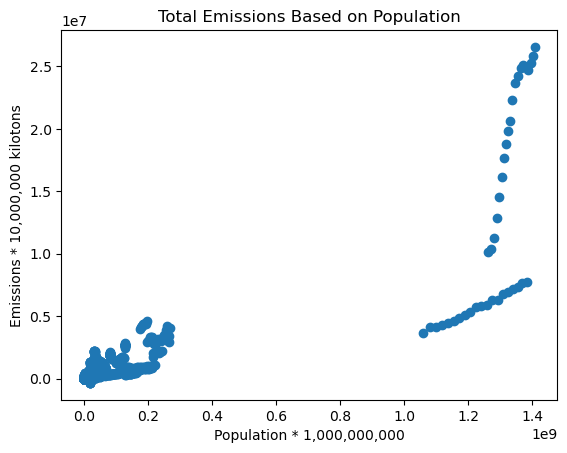

In [393]:
plt.scatter(emissions['population'], emissions['total_emissions'])
plt.title('Total Emissions Based on Population')
plt.xlabel('Population * 1,000,000,000')
plt.ylabel('Emissions * 10,000,000 kilotons')
plt.show()

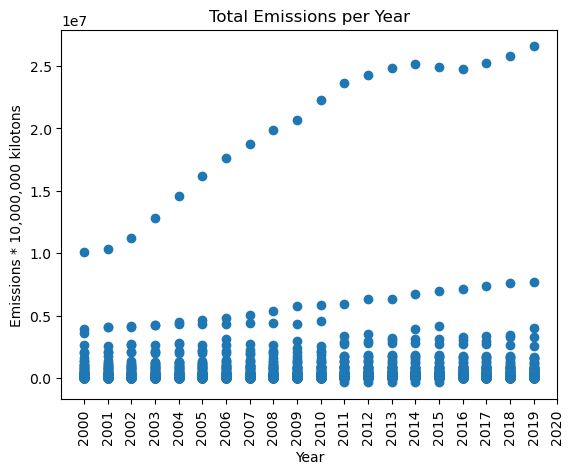

In [394]:
plt.scatter(emissions['year'], emissions['total_emissions'])
plt.title('Total Emissions per Year')
plt.xlabel('Year')
plt.xticks(np.arange(2000, 2021, 1), rotation=90)
plt.ylabel('Emissions * 10,000,000 kilotons')
plt.show()

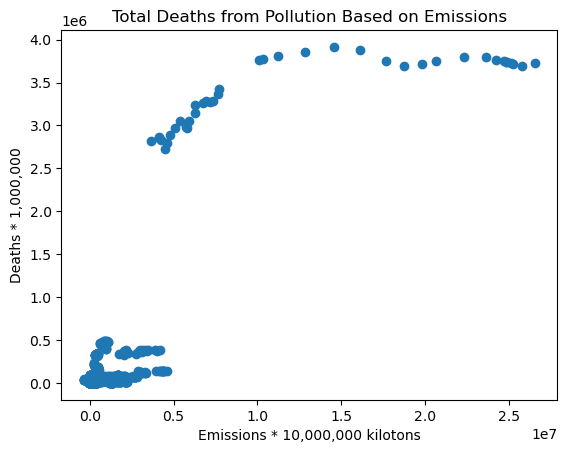

In [395]:
plt.scatter(emissions['total_emissions'], emissions['total_deaths'])
plt.title('Total Deaths from Pollution Based on Emissions')
plt.xlabel('Emissions * 10,000,000 kilotons')
plt.ylabel('Deaths * 1,000,000')
plt.show()

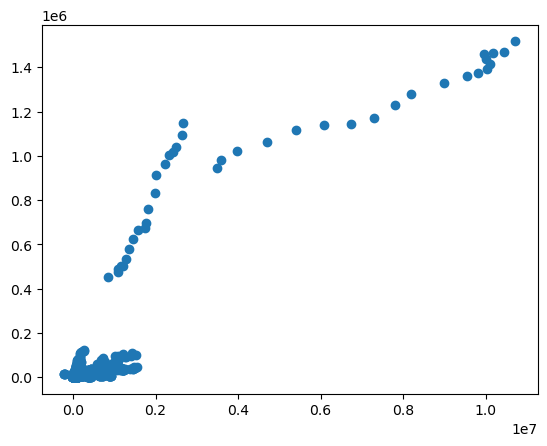

In [396]:
plt.scatter(emissions['Emissions_CO2'], emissions['deaths_caused_by_outdoor_air_pollution'])

In [397]:
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

In [398]:
model = KMeans(n_clusters=3, random_state=5)
model

KMeans(n_clusters=3, random_state=5)

In [399]:
cluster_df = emissions.drop(columns=["Emissions_CH4", "Emissions_CO2", "Emissions_CO2eq_AR5", "Emissions_CO2eq_from_CH4_AR5", "Emissions_CO2eq_from_F-gases_AR5", "Emissions_CO2eq_from_N2O_AR5",\
    "Emissions_N2O", "deaths_caused_by_outdoor_air_pollution", "deaths_caused_by_household_pollution_from_solid_fuels", "deaths_caused_by_air_pollution"])
cluster_df.reset_index(drop=True)
cluster_df

,area,year,population,total_emissions,total_deaths
0,Afghanistan,2000,19542982.0,27123.3505,97916
1,Afghanistan,2001,19688632.0,28759.7525,97702
2,Afghanistan,2002,21000256.0,34547.2220,95830
3,Afghanistan,2003,22645130.0,35964.2146,97756
4,Afghanistan,2004,23553551.0,35467.5511,97047
...,...,...,...,...,...
2915,Suriname,2015,575475.0,24131.1282,657
2916,Suriname,2016,581453.0,25550.5816,648
2917,Suriname,2017,587559.0,25939.3327,626
2918,Suriname,2018,593715.0,26664.4259,620


In [400]:
#model.fit(cluster_df)

In [401]:
import plotly.express as px
import hvplot.pandas
import plotly.graph_objects as go

In [402]:
emissions_per_person_df = cluster_df
emissions_per_person_df['emissions_per_person'] = (emissions_per_person_df['population']/emissions_per_person_df['total_emissions'])
emissions_per_person_df = emissions_per_person_df.drop(columns='population')
emissions_per_person_df = emissions_per_person_df[emissions_per_person_df['emissions_per_person'] > 0]
emissions_per_person_df

,area,year,total_emissions,total_deaths,emissions_per_person
0,Afghanistan,2000,27123.3505,97916,720.522415
1,Afghanistan,2001,28759.7525,97702,684.589758
2,Afghanistan,2002,34547.2220,95830,607.871047
3,Afghanistan,2003,35964.2146,97756,629.657293
4,Afghanistan,2004,35467.5511,97047,664.087321
...,...,...,...,...,...
2915,Suriname,2015,24131.1282,657,23.847828
2916,Suriname,2016,25550.5816,648,22.756938
2917,Suriname,2017,25939.3327,626,22.651277
2918,Suriname,2018,26664.4259,620,22.266183


In [403]:
#fig = px.scatter_3d(cluster_df, x='population', y="total_emissions", z="total_deaths", color="class", symbol="class", size="population", width=800)
#fig.update_layout(legend=dict(x=0,y=1))
#fig.show()

In [404]:
#import numpy as np
#fig2 = px.scatter_3d(emissions_per_person_df, x='emissions_per_person', y="total_emissions", z="total_deaths", color="class", symbol="class", size="class", width=800)
#fig2.update_layout(legend=dict(x=0,y=1), scene = dict(xaxis = dict(nticks=4, range=[0,300],),))
#fig2.show()

In [405]:
standardized_df = cluster_df
standardized_df['per_person2'] = standardized_df['total_emissions']/standardized_df['population']


In [406]:
standardized_df['death_rate'] = standardized_df['total_deaths']/standardized_df['population']

In [407]:
standardized_df = standardized_df[standardized_df['death_rate']>0]
standardized_df = standardized_df[standardized_df['emissions_per_person']>0]
standardized_df

,area,year,population,total_emissions,total_deaths,emissions_per_person,per_person2,death_rate
0,Afghanistan,2000,19542982.0,27123.3505,97916,720.522415,0.001388,0.005010
1,Afghanistan,2001,19688632.0,28759.7525,97702,684.589758,0.001461,0.004962
2,Afghanistan,2002,21000256.0,34547.2220,95830,607.871047,0.001645,0.004563
3,Afghanistan,2003,22645130.0,35964.2146,97756,629.657293,0.001588,0.004317
4,Afghanistan,2004,23553551.0,35467.5511,97047,664.087321,0.001506,0.004120
...,...,...,...,...,...,...,...,...
2915,Suriname,2015,575475.0,24131.1282,657,23.847828,0.041933,0.001142
2916,Suriname,2016,581453.0,25550.5816,648,22.756938,0.043943,0.001114
2917,Suriname,2017,587559.0,25939.3327,626,22.651277,0.044148,0.001065
2918,Suriname,2018,593715.0,26664.4259,620,22.266183,0.044911,0.001044


In [408]:
import numpy as np

c:\Users\kgmon\anaconda3\envs\mlenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



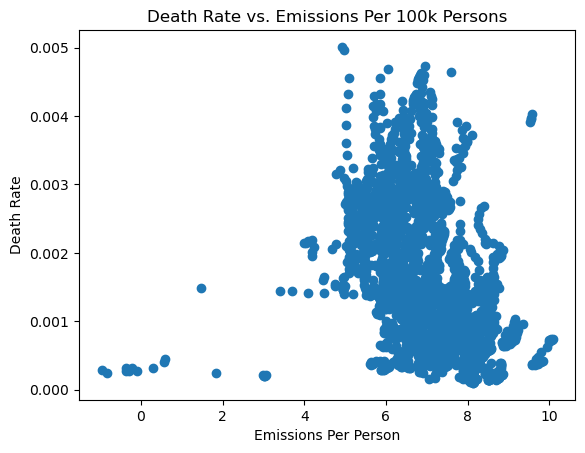

In [409]:
plt.scatter(np.log(standardized_df['per_person2']*100000), standardized_df['death_rate'])
plt.title('Death Rate vs. Emissions Per 100k Persons')
plt.xlabel('Emissions Per Person')
plt.ylabel('Death Rate')
plt.show()

In [410]:
# look per person
# total emissions and total deaths, pop as second model

In [411]:
# individual types
# g20
# smaller, nearby years

In [427]:
from sklearn.linear_model import LinearRegression
X = standardized_df[['total_emissions', 'population']]
y = standardized_df.death_rate
X.shape

(285, 2)

In [428]:
model = LinearRegression()

In [429]:
model.fit(X, y)

LinearRegression()

In [430]:
y_pred = model.predict(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [431]:
model.fit(X_train, y_train)

LinearRegression()

In [432]:
predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
119,0.001282,0.000891
2578,0.001237,0.000370
1638,0.001313,0.001113
2158,0.001247,0.000252
779,0.001260,0.001087
...,...,...
418,0.001248,0.001749
2378,0.001523,0.002166
999,0.001247,0.000312
599,0.001241,0.000234


In [433]:
y_pred = model.predict(X)
print(y_pred.shape)

(285,)


In [439]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

7.46425628551799e-07
0.02831918039145065


In [420]:
standardized_df

,area,year,population,total_emissions,total_deaths,emissions_per_person,per_person2,death_rate
0,Afghanistan,2000,19542982.0,27123.3505,97916,720.522415,0.001388,0.005010
1,Afghanistan,2001,19688632.0,28759.7525,97702,684.589758,0.001461,0.004962
2,Afghanistan,2002,21000256.0,34547.2220,95830,607.871047,0.001645,0.004563
3,Afghanistan,2003,22645130.0,35964.2146,97756,629.657293,0.001588,0.004317
4,Afghanistan,2004,23553551.0,35467.5511,97047,664.087321,0.001506,0.004120
...,...,...,...,...,...,...,...,...
2915,Suriname,2015,575475.0,24131.1282,657,23.847828,0.041933,0.001142
2916,Suriname,2016,581453.0,25550.5816,648,22.756938,0.043943,0.001114
2917,Suriname,2017,587559.0,25939.3327,626,22.651277,0.044148,0.001065
2918,Suriname,2018,593715.0,26664.4259,620,22.266183,0.044911,0.001044


In [421]:
standardized_df = standardized_df.loc[standardized_df['year'] >= 2018]
standardized_df

,area,year,population,total_emissions,total_deaths,emissions_per_person,per_person2,death_rate
18,Afghanistan,2018,36686784.0,62370.3335,74580,588.208880,0.001700,0.002033
19,Afghanistan,2019,37769499.0,64118.2639,74355,589.059914,0.001698,0.001969
38,Albania,2018,2866376.0,18820.4739,4541,152.300947,0.006566,0.001584
39,Albania,2019,2854191.0,18590.5588,4556,153.529059,0.006513,0.001596
58,Algeria,2018,41927007.0,566302.4784,43039,74.036418,0.013507,0.001027
...,...,...,...,...,...,...,...,...
2879,Spain,2019,47134837.0,646443.5616,23737,72.914079,0.013715,0.000504
2898,Sri Lanka,2018,21670000.0,77223.9525,28037,280.612418,0.003564,0.001294
2899,Sri Lanka,2019,21803000.0,82059.2177,28295,265.698365,0.003764,0.001298
2918,Suriname,2018,593715.0,26664.4259,620,22.266183,0.044911,0.001044


In [426]:
fig = px.scatter_3d(standardized_df, x='per_person2', y='total_emissions', z='death_rate', width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.show()
# 1 maybe 3 years for training

In [ ]:
emissions['death_rate'] = emissions['total_deaths']/emissions['population']
emissions['emissions_per_person'] = emissions['total_emissions'] / emissions['population']

In [ ]:
emissions.sort_values(by='death_rate').head()

In [ ]:
#-----------------------------------------------

In [ ]:
cluster_df